**car price prediction using machine learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("/content/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()  #checking the null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()   #getting statistical information

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
fuel_type=df["Fuel_Type"]
seller_type=df["Seller_Type"]
transmission_type=df["Transmission"]
selling_price=df["Selling_Price"]

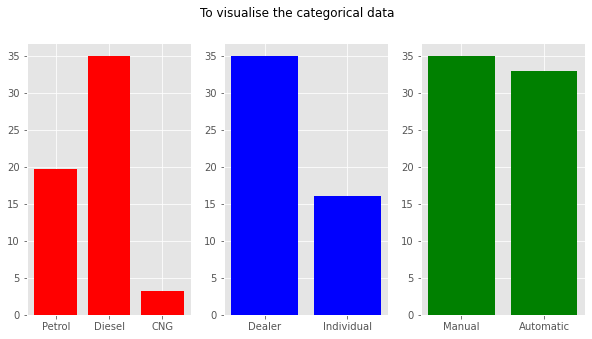

In [12]:
from matplotlib import style
style.use('ggplot')
figg=plt.figure(figsize=(10,5))
figg.suptitle("To visualise the categorical data")
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color="red")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color="blue")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color="Green")
plt.show()

In [13]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


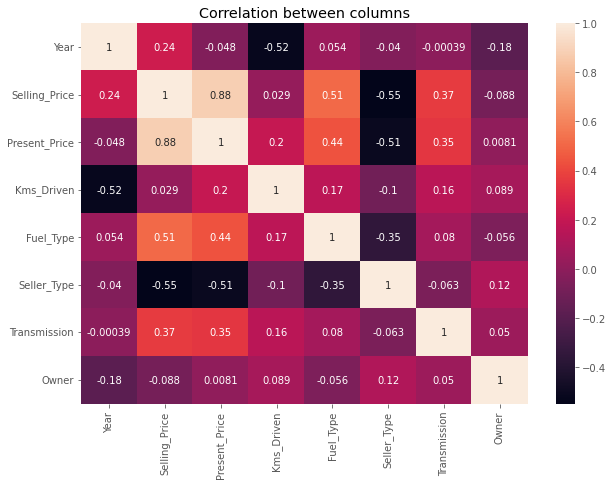

In [15]:
#plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between columns")
plt.show()

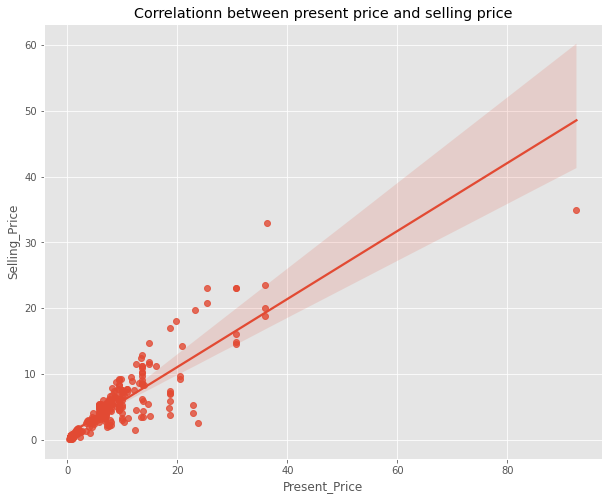

In [16]:
#plotting the regression line between present price and selling price
plt.figure(figsize=(10,8))
plt.title("Correlationn between present price and selling price")
sns.regplot(x="Present_Price",y="Selling_Price", data=df)

In [17]:
x=df.drop(['Car_Name', 'Selling_Price'], axis=1)
y=df['Selling_Price']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
pred=model.predict(x_test)

In [21]:
print("MAE : ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE : ", (metrics.mean_squared_error(pred, y_test)))
print("R2_Score : ", (metrics.r2_score(pred, y_test)))

MAE :  1.2330843382595142
MSE :  3.4316043692565885
R2_Score :  0.8339672612698636


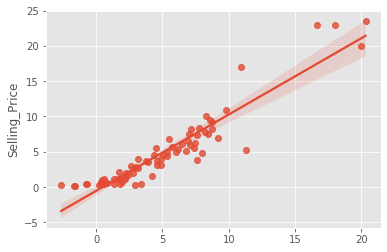

In [22]:
sns.regplot(x=pred, y =y_test)
plt.show()